# Chapter 2

## Distribution

One of the best ways to describe a variable is to report the values that appear in the dataset and how many times each value appears. This description is called the distribution of the variable.


In [2]:
import numpy as np

Given a list of values, there are several ways to count the frequency of each value.

In [1]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [2]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [3]:
from collections import Counter
counter = Counter(t)
counter

Counter({2: 2, 1: 1, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [4]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [5]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [9]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [6]:
hist[4]

0

The `Values` method returns the values:

In [7]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [8]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [9]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

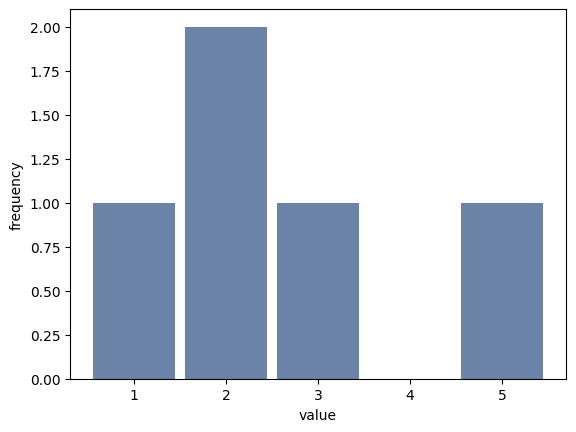

In [10]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [11]:
import nsfg

In [12]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

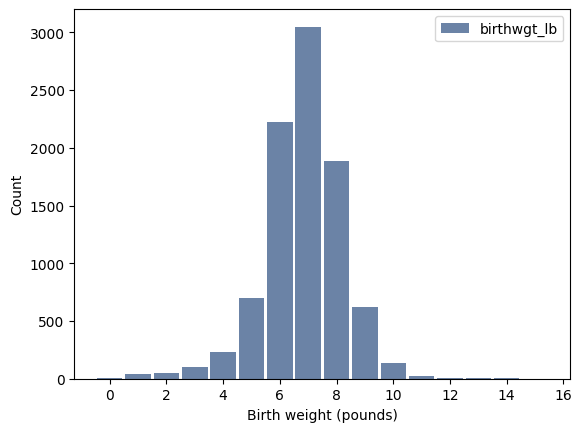

In [13]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [17]:
import numpy as np
ages = np.floor(live.agepreg)

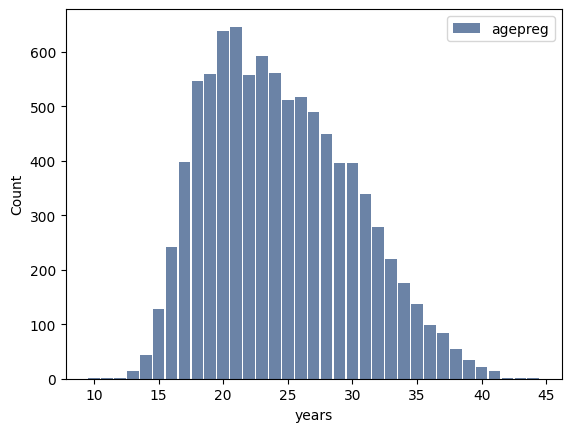

In [16]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

`Hist` provides smallest, which select the lowest values and their frequencies.

In [18]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

10.0 2
11.0 1
12.0 1
13.0 14
14.0 43
15.0 128
16.0 242
17.0 398
18.0 546
19.0 559


Use `Largest` to display the longest pregnancy lengths.

In [19]:
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

44.0 1
43.0 1
42.0 2
41.0 14
40.0 21
39.0 34
38.0 55
37.0 83
36.0 99
35.0 138


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [20]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

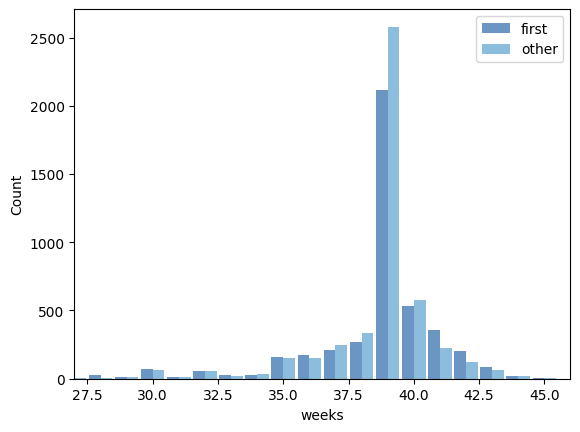

In [21]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

Statistics designed to answer these questions are called summary statistics. By far the most common summary statistic is the mean, which is meant to describe the central tendency of the distribution.

If you have a sample of n values, xi, the mean, x, is the sum of the values divided by the number of values; in other words 



In [22]:
from IPython.display import display, Math

n = 5
xi = [1, 2, 3, 4, 5]

formula = r"\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i"

display(Math(formula))


<IPython.core.display.Math object>

Variance is a summary statistic intended to describe the variability or spread of a distribution. The term xi − x is called the “deviation from the mean,” so variance is the mean squared deviation. The square root of variance, S, is the standard deviation. 

In [31]:
from IPython.display import display, Math

n = 5
xi = [1, 2, 3, 4, 5]

formula = r"S^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2"

display(Math(formula))



<IPython.core.display.Math object>

`Series` provides methods to compute summary statistics:

In [25]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [27]:
mean, std, var

(38.56055968517709, 2.702343810070587, 7.302662067826817)

As an exercise, confirm that `std` is the square root of `var`. <br>
std = √var

In [28]:
var = std**2
var

7.302662067826817

Here's are the mean pregnancy lengths for first babies and others:

In [32]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [33]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [34]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [36]:
cohen_d = CohenEffectSize(firsts.prglngth, others.prglngth)
cohen_d

0.028879044654449834

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [45]:
df = nsfg.ReadFemPreg()
first = df[df.birthord == 1]
others = df[df.birthord != 1]


7.201094430437772

In [47]:
first.totalwgt_lb.mean(), others.totalwgt_lb.mean()

(7.201094430437772, 7.325855614973262)

In [69]:
first.totalwgt_lb.median(), others.totalwgt_lb.median()

(7.3125, 7.375)

In [68]:
first.totalwgt_lb.std(), others.totalwgt_lb.std()

(1.4205728777207405, 1.3941954762143187)

In [49]:
choen_d = CohenEffectSize(first.totalwgt_lb, others.totalwgt_lb)
choen_d

-0.08867292707260174

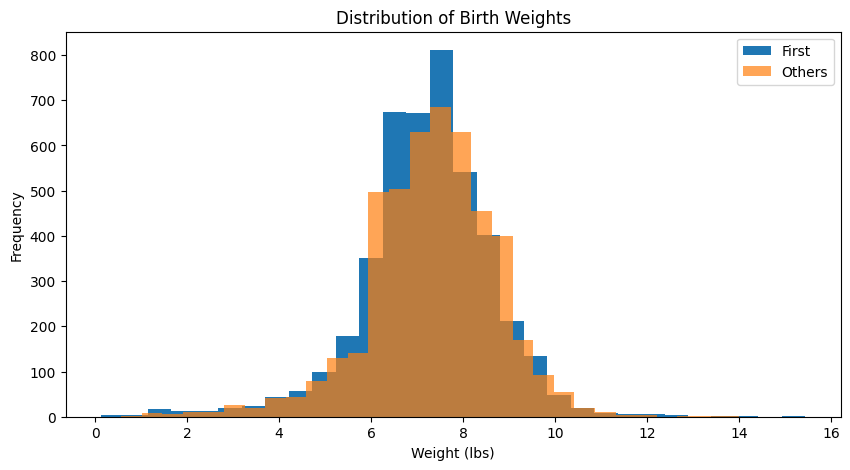

In [66]:
# Create a figure
fig = plt.figure(figsize=(10, 5))

# Plotting the first histogram
plt.hist(first.totalwgt_lb, bins=30, label='First')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')

# Plotting the second histogram
plt.hist(others.totalwgt_lb, bins=30, label='Others', alpha=0.7)
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Set the title
plt.title('Distribution of Birth Weights')

# Display the plot
plt.show()

In [71]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Female.pdf).

In [83]:
resp.totincr.value_counts().sort_index()

totincr
1      299
2      301
3      266
4      421
5      445
6      559
7      583
8      606
9      607
10     468
11     647
12     658
13     623
14    1160
Name: count, dtype: int64

![](https://i.imgur.com/2wrRZBI.png)

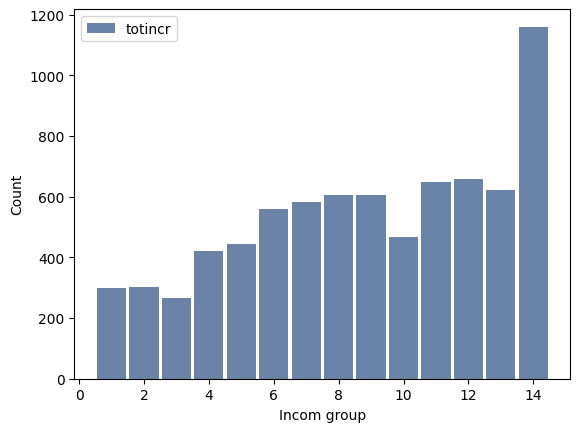

In [86]:
hist = thinkstats2.Hist(resp.totincr, label='totincr')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Incom group', ylabel='Count')

Text(0, 0.5, 'Frequency')

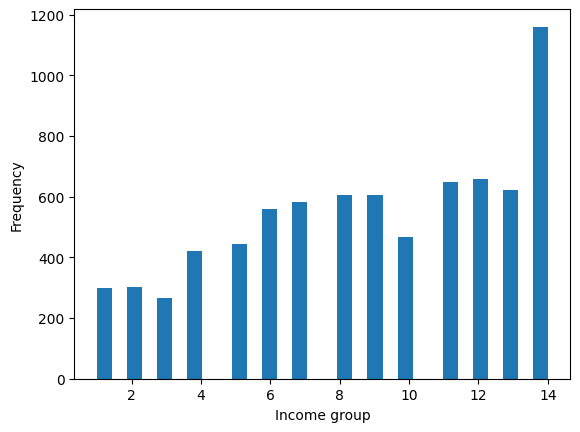

In [92]:
hist = resp.totincr.plot(kind='hist', bins=30)
hist.set_xlabel('Income group')
hist.set_ylabel('Frequency')

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

Text(0, 0.5, 'Frequency')

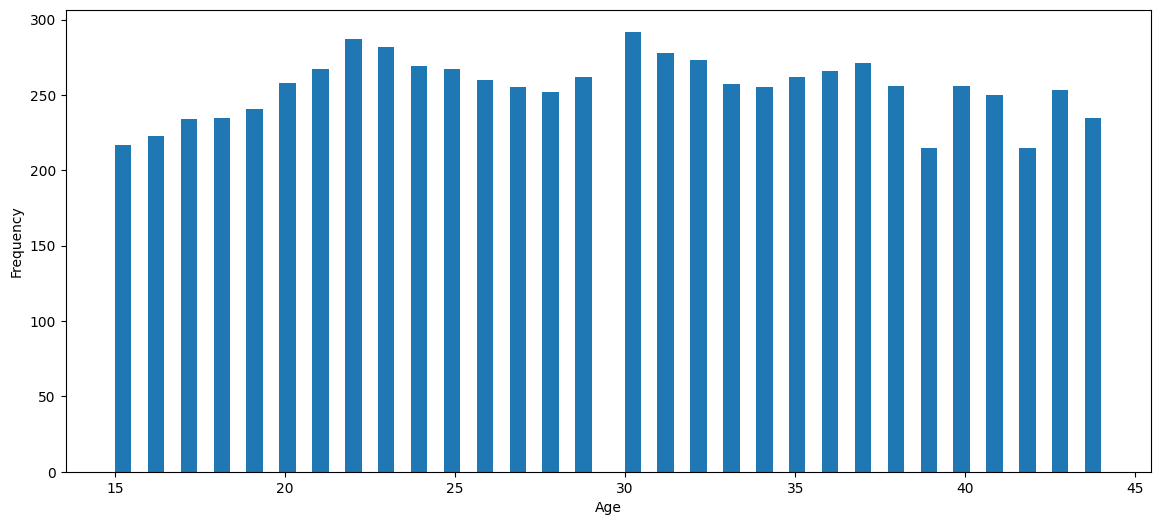

In [100]:
hist = resp.age_r.plot(kind='hist', bins=60, figsize=(14,6))
hist.set_xlabel('Age')
hist.set_ylabel('Frequency')

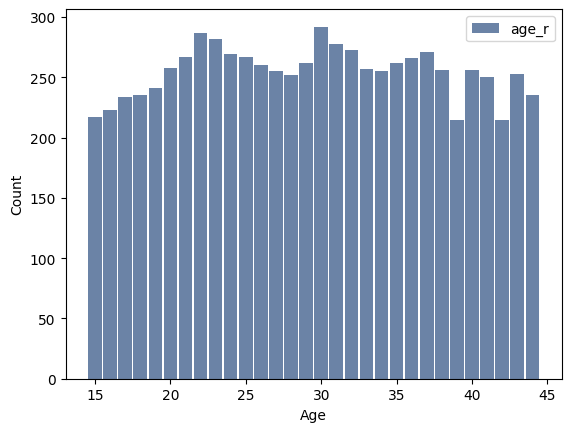

In [101]:
hist = thinkstats2.Hist(resp.age_r, label='age_r')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Age', ylabel='Count')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

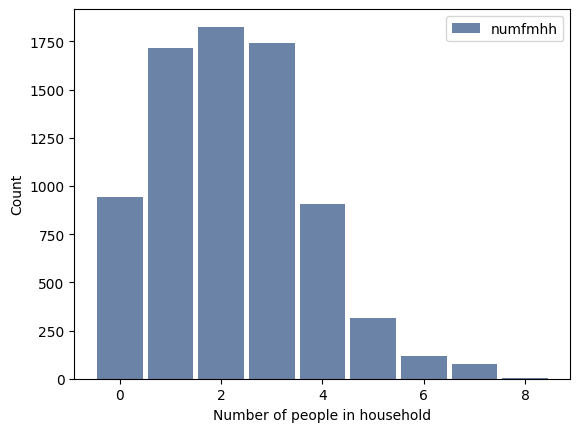

In [105]:
hist = thinkstats2.Hist(resp.numfmhh, label='numfmhh')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of people in household', ylabel='Count')

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

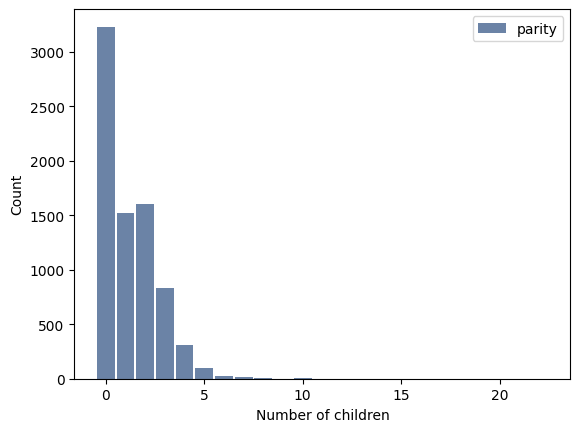

In [104]:
hist = thinkstats2.Hist(resp.parity, label='parity')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of children', ylabel='Count')

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [107]:
thinkstats2.Hist(resp.parity).Largest(10)

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

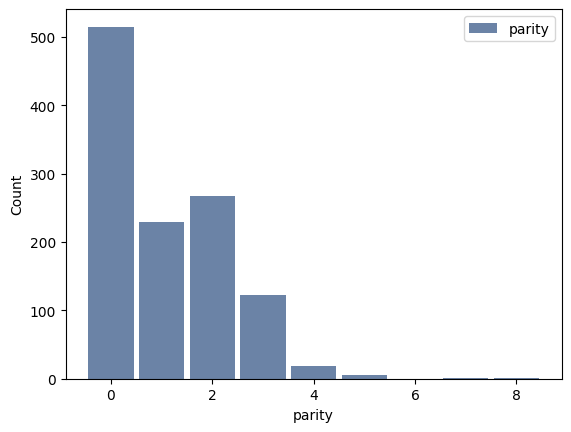

In [110]:
rich = resp[resp.totincr == 14]
hist = thinkstats2.Hist(rich.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Config(xlabel='parity', ylabel='Count')

Find the largest parities for high income respondents.

In [111]:
hist.Largest(10)

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123), (2, 267), (1, 229), (0, 515)]

Compare the mean <tt>parity</tt> for high income respondents and others.

In [112]:
not_rich = resp[resp.totincr < 14]
rich.parity.mean(), not_rich.parity.mean()

(1.0758620689655172, 1.2495758136665125)

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [113]:
# This effect is about 10 times stronger than the difference in pregnancy length.
# But remembering the design of the study, we should not make too much of this
# apparent effect.

CohenEffectSize(rich.parity, not_rich.parity)

-0.12511855314660367